In [309]:
from sklearn.datasets import load_diabetes
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [310]:



X,y = load_diabetes(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(lr.coef_)
print(lr.intercept_)
print(r2_score(y_test,y_pred))


[  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238]
151.88331005254167
0.4399338661568969


In [311]:


import random
class MBGDR:
    def __init__(self,batch_size,learning_rate=0.01,epochs=100):
        self.intercept = None
        self.coefs = None
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.batch_size = batch_size

    def fit(self,X_train,y_train):
        self.coefs = np.ones(X_train.shape[1])
        self.intercept = 0
        for i in range(self.epochs):
            for j in range(int(X_train.shape[0]/self.batch_size)):
                idx = random.sample(range(X_train.shape[0]),self.batch_size)

                y_hat = np.dot(X_train[idx],self.coefs) + self.intercept
                intercept_der = -2 * np.mean(y_train[idx]-y_hat)
                self.intercept = self.intercept -(self.learning_rate * intercept_der)
                coef_der = -2 * np.dot(y_train[idx]-y_hat,X_train[idx])
                self.coefs = self.coefs  - (self.learning_rate * coef_der )

        print(self.coefs)
        print(self.intercept)
    
    def predict(self,X_test):
        return np.dot(X_test,self.coefs)+self.intercept


In [312]:
mbgd = MBGDR(batch_size=int(X_train.shape[0]/10),learning_rate=0.01,epochs=75)
mbgd.fit(X_train,y_train)
y_pred1 = mbgd.predict(X_test)
print(r2_score(y_test,y_pred))


[  48.96883881 -109.77544218  413.65933279  282.24839221   -9.56284869
  -69.25536583 -181.72109952  117.85810814  371.35118276  119.64175726]
150.69134652785652
0.4399338661568969


In [313]:

from sklearn.linear_model import SGDRegressor

mbg = SGDRegressor(learning_rate='constant',eta0=0.2)

batch_size = 35
for i in range(100):
    idx = random.sample(range(X_train.shape[0]),batch_size)
    mbg.partial_fit(X_train[idx],y_train[idx])
y_pred2 = mbg.predict(X_test)
print(r2_score(y_test,y_pred2))


0.4502580184847028


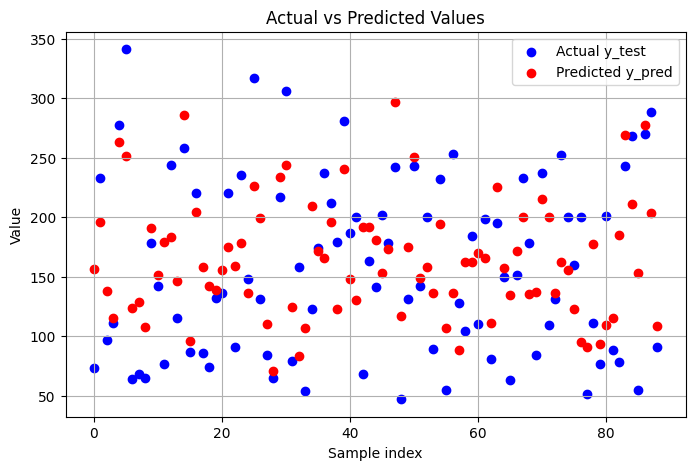

In [314]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8,5))

# x-axis (sample numbers)
x = np.arange(len(y_test))

# Actual points
plt.scatter(x, y_test, color="blue", label="Actual y_test")

# Predicted points
plt.scatter(x, y_pred2, color="red", label="Predicted y_pred")

plt.xlabel("Sample index")
plt.ylabel("Value")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.grid(True)
plt.show()
